In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from google.colab import files
import tensorflow as tf
Co2 = files.upload()
Methane = files.upload()
anomaly={"vals":{"1880":"-0.24","1881":"-0.27","1882":"-0.15","1883":"-0.24","1884":"-0.35","1885":"-0.14","1886":"-0.29","1887":"-0.19","1888":"-0.05","1889":"-0.30","1890":"-0.46","1891":"-0.40","1892":"-0.49","1893":"-0.19","1894":"-0.35","1895":"-0.18","1896":"-0.15","1897":"-0.26","1898":"-0.32","1899":"0.10","1900":"-0.14","1901":"-0.20","1902":"-0.34","1903":"-0.48","1904":"-0.17","1905":"-0.09","1906":"-0.35","1907":"-0.49","1908":"-0.51","1909":"-0.29","1910":"-0.49","1911":"-0.25","1912":"-0.43","1913":"-0.16","1914":"-0.10","1915":"-0.03","1916":"-0.44","1917":"-0.22","1918":"-0.12","1919":"-0.40","1920":"-0.23","1921":"-0.17","1922":"-0.15","1923":"-0.02","1924":"-0.29","1925":"0.05","1926":"-0.07","1927":"-0.05","1928":"-0.09","1929":"-0.11","1930":"0.16","1931":"-0.13","1932":"-0.22","1933":"-0.25","1934":"0.03","1935":"-0.27","1936":"-0.01","1937":"0.08","1938":"0.02","1939":"0.08","1940":"0.21","1941":"0.32","1942":"0.09","1943":"0.20","1944":"0.14","1945":"0.19","1946":"-0.04","1947":"0.00","1948":"-0.07","1949":"-0.08","1950":"-0.34","1951":"0.03","1952":"-0.14","1953":"-0.02","1954":"0.05","1955":"-0.23","1956":"-0.16","1957":"0.11","1958":"0.07","1959":"-0.06","1960":"-0.04","1961":"0.04","1962":"0.09","1963":"0.21","1964":"-0.21","1965":"-0.06","1966":"-0.03","1967":"0.00","1968":"0.01","1969":"0.21","1970":"0.04","1971":"0.03","1972":"0.08","1973":"0.03","1974":"-0.06","1975":"-0.16","1976":"-0.03","1977":"0.26","1978":"0.20","1979":"0.29","1980":"0.31","1981":"0.27","1982":"0.15","1983":"0.45","1984":"0.06","1985":"0.14","1986":"0.16","1987":"0.35","1988":"0.21","1989":"0.23","1990":"0.48","1991":"0.30","1992":"0.04","1993":"0.07","1994":"0.46","1995":"0.45","1996":"0.29","1997":"0.58","1998":"0.42","1999":"0.35","2000":"0.27","2001":"0.71","2002":"0.60","2003":"0.57","2004":"0.76","2005":"0.72","2006":"0.65","2007":"0.53","2008":"0.67","2009":"0.71","2010":"0.75","2011":"0.50","2012":"0.71","2013":"0.81","2014":"0.65","2015":"1.01","2016":"0.79","2017":"0.81","2018":"0.79","2019":"0.92","2020":"0.97"}}



Saving ch4-concentration.csv to ch4-concentration.csv


Saving co2-concentration-long-term.csv to co2-concentration-long-term.csv


In [ ]:
tempAnomaly = pd.DataFrame.from_dict(anomaly)
CO2_Concentraton = pd.read_csv('co2-concentration-long-term.csv')
Methane_Concentration = pd.read_csv('ch4-concentration.csv')


In [ ]:
tempAnomaly.head()

,vals
1880,-0.24
1881,-0.27
1882,-0.15
1883,-0.24
1884,-0.35


In [ ]:
CO2_Concentraton.head()


,Year,"CO2 concentrations (NOAA, 2018)"
0,-803719,207.29
1,-803182,202.23
2,-802573,204.86
3,-802060,207.50
4,-801975,202.92


In [ ]:
Methane_Concentration.head()

,Year,CH4 concentration (EEA & NOAA (2019))
0,1750,719.01
1,1755,719.97
2,1760,720.93
3,1765,723.71
4,1770,726.50


In [ ]:

def fillMissingData(df,columnName):
  inRange=df['Year']>=1880 
  tmp=df[inRange]
  list1=tmp['Year'].tolist()
  list2=tmp[columnName].tolist()
  years=[]
  vals=[]
  for i in range(1880,2019):
    if i in list1:
      years.append(i)
      vals.append(list2[list1.index(i)])
    else:
      years.append(i)
      cur=i+1
      while True:
        if cur in list1:
          break
        else:
          cur+=1
      vals.append((vals[len(vals)-1]+list2[list1.index(cur)])/2)
  return [vals,years]

In [ ]:
arr= [CO2_Concentraton,"CO2 concentrations (NOAA, 2018)",Methane_Concentration,"CH4 concentration (EEA & NOAA (2019))"]
vals=[tempAnomaly['vals'].tolist()]
for i in range(0,len(arr),2):
  vals.append(fillMissingData(arr[i],arr[i+1])[0])


In [ ]:

dates=pd.DataFrame(fillMissingData(arr[0],arr[1])[1],columns=["year"])


In [ ]:
df = pd.DataFrame(list(zip(fillMissingData(arr[0],arr[1])[1],vals[0][:-2], vals[1],vals[2])), 
               columns =['Year','temperature','CO2', 'Methane'])
cols = list(df)[1:]
training_df = df[cols].astype(float)
training_df['Datetime']=pd.to_datetime(dates['year'], format='%Y') 
training_df.head()

,temperature,CO2,Methane,Datetime
0,-0.24,287.7700,847.480000,1880-01-01
1,-0.27,290.1150,852.415000,1881-01-01
2,-0.15,291.2875,854.882500,1882-01-01
3,-0.24,292.4600,856.116250,1883-01-01
4,-0.35,289.4900,856.733125,1884-01-01


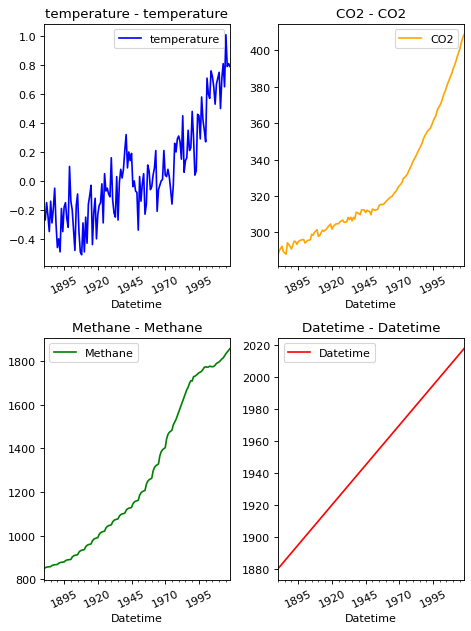

In [ ]:

feature_keys =training_df.columns.tolist()

colors = [
    "blue",
    "orange",
    "green",
    "red",
]

titles = [
    "temperature",
    "CO2",
    "Methane",
    "Datetime",
]



def show_raw_visualization(data):
    time_data = data["Datetime"]
    fig, axes = plt.subplots(
        nrows=2, ncols=2, figsize=(6, 8), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(training_df)


In [ ]:
def process(df,n):   
  arr=[]
  for i in df.columns:
    tmp=df[i].tolist()
    new_list=[]
    for j in range(len(tmp)-1):
      cur=tmp[j]
      next=tmp[j+1]
      new_list.append(cur)
      new_list.extend([(cur+(next-cur)/x) for x in reversed(range(1,n))])
    arr.append(new_list)
  
  dictionairy={}
  dictionairy["temperature"]=arr[0]
  dictionairy["CO2"]=arr[1]
  dictionairy["Methane"]=arr[2]
  dictionairy["Datetime"]=arr[3]
  return pd.DataFrame(data=dictionairy)
training_df=process(training_df,1)

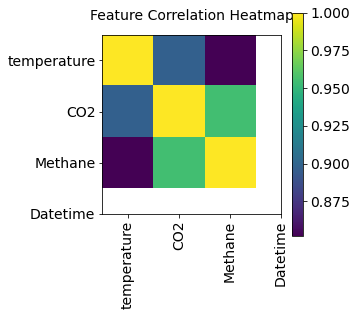

In [ ]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(training_df)

In [ ]:
split_fraction = 0.8
train_split = int(split_fraction * int(df.shape[0]))

step = 1

past = 10
future = 1
learning_rate = 0.001
batch_size = 256
epochs = 5
import keras


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [ ]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1,2]]),
)
selected_features = [feature_keys[i] for i in [0, 1,2]]
features = training_df[selected_features]
features.index = training_df["Datetime"]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]


The selected parameters are: temperature, CO2, Methane


In [ ]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(3)]].values
y_train = features.iloc[start:end][[0]]

sequence_length = int(past / step)



In [ ]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [ ]:

x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(3)]].values
y_val = features.iloc[label_start:][[0]].values

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch
    

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (102, 10, 3)
Target shape: (102, 1)


In [ ]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(256)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 10, 3)]           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               266240    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 266,497
Trainable params: 266,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.8743 - val_loss: 4.6288

Epoch 00001: loss improved from inf to 0.87433, saving model to model_checkpoint.h5
Epoch 2/5
1/1 [==============================] - 0s 163ms/step - loss: 0.6222 - val_loss: 1.6256

Epoch 00002: loss improved from 0.87433 to 0.62221, saving model to model_checkpoint.h5
Epoch 3/5
1/1 [==============================] - 0s 177ms/step - loss: 0.5068 - val_loss: 0.3407

Epoch 00003: loss improved from 0.62221 to 0.50679, saving model to model_checkpoint.h5
Epoch 4/5
1/1 [==============================] - 0s 166ms/step - loss: 0.5295 - val_loss: 0.1972

Epoch 00004: loss did not improve from 0.50679
Epoch 5/5
1/1 [==============================] - 0s 162ms/step - loss: 0.5704 - val_loss: 0.3117

Epoch 00005: loss did not improve from 0.50679


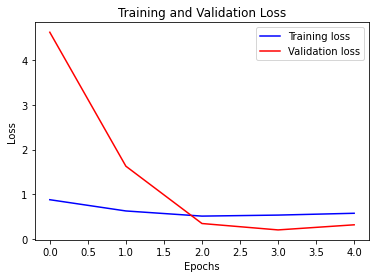

In [ ]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

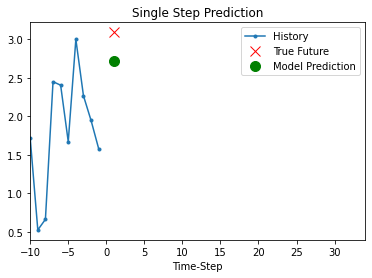

In [ ]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(1, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(1):
    show_plot(
        [x[0][:, 0].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )